In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
files = ['Employee attrition/employee_survey_data.csv',
         'Employee attrition/general_data.csv',
         'Employee attrition/manager_survey_data.csv']

In [3]:
df = pd.read_csv(files[0])

for file in files:

    if file == files[0]: continue

    temp = pd.read_csv(file)

    df = pd.merge(df, temp, on='EmployeeID')

df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,...,17,8,1,10.0,5,3,0,2,3,3
4406,4407,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,...,15,8,0,10.0,2,3,0,2,2,3
4407,4408,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,...,20,8,0,5.0,4,4,1,2,3,4
4408,4409,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,18,2,...,14,8,1,10.0,2,9,7,8,2,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

In [5]:
null_counts = df.isna().sum()
null_cols = null_counts.where(null_counts > 0).dropna()
null_cols

EnvironmentSatisfaction    25.0
JobSatisfaction            20.0
WorkLifeBalance            38.0
NumCompaniesWorked         19.0
TotalWorkingYears           9.0
dtype: float64

In [6]:
for null_col in null_cols.index:

    print(null_col, '->', df[null_col].unique())

EnvironmentSatisfaction -> [ 3.  2.  4.  1. nan]
JobSatisfaction -> [ 4.  2.  1.  3. nan]
WorkLifeBalance -> [ 2.  4.  1.  3. nan]
NumCompaniesWorked -> [ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8. nan]
TotalWorkingYears -> [ 1.  6.  5. 13.  9. 28. 10. 21. 16. 37.  7.  3. 15.  8. nan 12. 17. 19.
 22.  2.  4. 23.  0. 11. 24. 25. 20. 14. 26. 18. 30. 36. 31. 33. 32. 34.
 40. 29. 35. 27. 38.]


In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [8]:
filled = imputer.fit_transform(df[null_cols.index])

In [9]:
df = df.drop(null_cols.index, axis=1)

In [10]:
df = pd.concat([df, pd.DataFrame(filled, columns=null_cols.index)], axis=1)
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5,0,3,3,3,2.0,2.0,1.0,1.0,5.0
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,8,7,5,2,3,4.0,4.0,3.0,3.0,13.0
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,6,0,4,3,3,4.0,1.0,3.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,3,0,2,3,3,4.0,1.0,3.0,3.0,10.0
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,3,0,2,2,3,4.0,4.0,3.0,2.0,10.0
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,4,1,2,3,4,1.0,3.0,3.0,0.0,5.0
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,9,7,8,2,3,4.0,1.0,3.0,0.0,10.0


In [11]:
df.isna().sum().sum()

0

In [12]:
for col in df.columns:

    if df[col].dtype == 'object':
        print(col, '->', df[col].unique(), '->', df[col].nunique())

Attrition -> ['No' 'Yes'] -> 2
BusinessTravel -> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] -> 3
Department -> ['Sales' 'Research & Development' 'Human Resources'] -> 3
EducationField -> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] -> 6
Gender -> ['Female' 'Male'] -> 2
JobRole -> ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager'] -> 9
MaritalStatus -> ['Married' 'Single' 'Divorced'] -> 3
Over18 -> ['Y'] -> 1


In [13]:
encoder = LabelEncoder()

In [14]:
for col in df.columns:

    if df[col].dtype == 'object':

        df[col] = encoder.fit_transform(df[col])

In [15]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [19]:
model = LogisticRegression(max_iter=1000000)

In [20]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8549410698096102


In [23]:
model2 = LogisticRegression(max_iter=1000000)

rfecv = RFECV(estimator=model2, step=1, cv=10)

rfecv.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(max_iter=1000000))

In [24]:
print(f"Optimal number of features: {rfecv.n_features_}")

selected_features = [name for name, selected in zip(df.columns, rfecv.support_) if selected]
print(f"Selected features: {selected_features}")

X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

Optimal number of features: 19
Selected features: ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobRole', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked']
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       935
           1       0.60      0.12      0.21       168

    accuracy                           0.85      1103
   macro avg       0.73      0.56      0.56      1103
weighted avg       0.82      0.85      0.81      1103



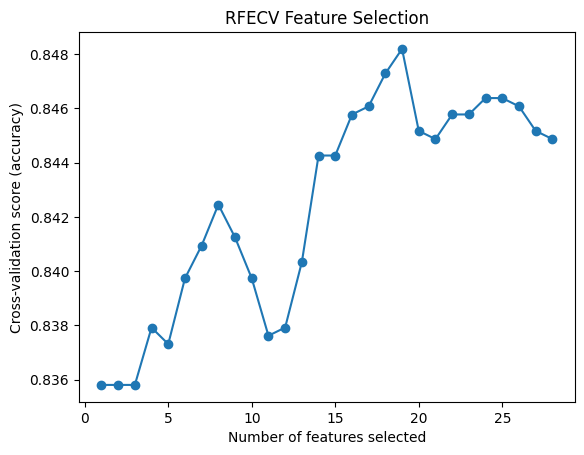

In [25]:
scores = rfecv.cv_results_['mean_test_score']

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.title("RFECV Feature Selection")
plt.show()

In [26]:
feature_ranks = rfecv.ranking_

feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_ranks
}).sort_values(by='Rank')


In [27]:
feature_ranking_df

,Feature,Rank
27,TotalWorkingYears,1
21,JobInvolvement,1
20,YearsWithCurrManager,1
19,YearsSinceLastPromotion,1
17,TrainingTimesLastYear,1
16,StockOptionLevel,1
15,StandardHours,1
26,NumCompaniesWorked,1
23,EnvironmentSatisfaction,1
11,MaritalStatus,1


In [28]:
important_features = feature_ranking_df.query('Rank == 1')['Feature'].values

print("Important Features: ", important_features)

Important Features:  ['TotalWorkingYears' 'JobInvolvement' 'YearsWithCurrManager'
 'YearsSinceLastPromotion' 'TrainingTimesLastYear' 'StockOptionLevel'
 'StandardHours' 'NumCompaniesWorked' 'EnvironmentSatisfaction'
 'MaritalStatus' 'WorkLifeBalance' 'JobLevel' 'Gender' 'EmployeeCount'
 'EducationField' 'Education' 'Department' 'Age' 'JobSatisfaction']


In [29]:
for col in important_features:
    print(f'{col} -> {df[col].unique()}')

TotalWorkingYears -> [ 1.  6.  5. 13.  9. 28. 10. 21. 16. 37.  7.  3. 15.  8. 12. 17. 19. 22.
  2.  4. 23.  0. 11. 24. 25. 20. 14. 26. 18. 30. 36. 31. 33. 32. 34. 40.
 29. 35. 27. 38.]
JobInvolvement -> [3 2 1 4]
YearsWithCurrManager -> [ 0  4  3  5  7  8 10 11 13  9  1  2  6 12 17 16 15 14]
YearsSinceLastPromotion -> [ 0  1  7  4 10  9  6 11  3  5  2  8 13 12 15 14]
TrainingTimesLastYear -> [6 3 2 5 4 0 1]
StockOptionLevel -> [0 1 3 2]
StandardHours -> [8]
NumCompaniesWorked -> [1. 0. 3. 4. 2. 7. 9. 5. 6. 8.]
EnvironmentSatisfaction -> [3. 2. 4. 1.]
MaritalStatus -> [1 2 0]
WorkLifeBalance -> [2. 4. 1. 3.]
JobLevel -> [1 4 3 2 5]
Gender -> [0 1]
EmployeeCount -> [1]
EducationField -> [1 4 3 2 5 0]
Education -> [2 1 4 5 3]
Department -> [2 1 0]
Age -> [51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]
JobSatisfaction -> [4. 2. 1. 3.]


In [30]:
categorical_columns = ['MaritalStatus', 'Gender', 'EducationField', 'Department',
                       'JobInvolvement', 'JobSatisfaction', 'JobLevel',
                       'EnvironmentSatisfaction', 'WorkLifeBalance']

numerical_columns = ['TotalWorkingYears',  'YearsWithCurrManager', 'YearsSinceLastPromotion',
                     'TrainingTimesLastYear', 'StockOptionLevel', 'StandardHours',
                     'NumCompaniesWorked',  'Education', 'Age']

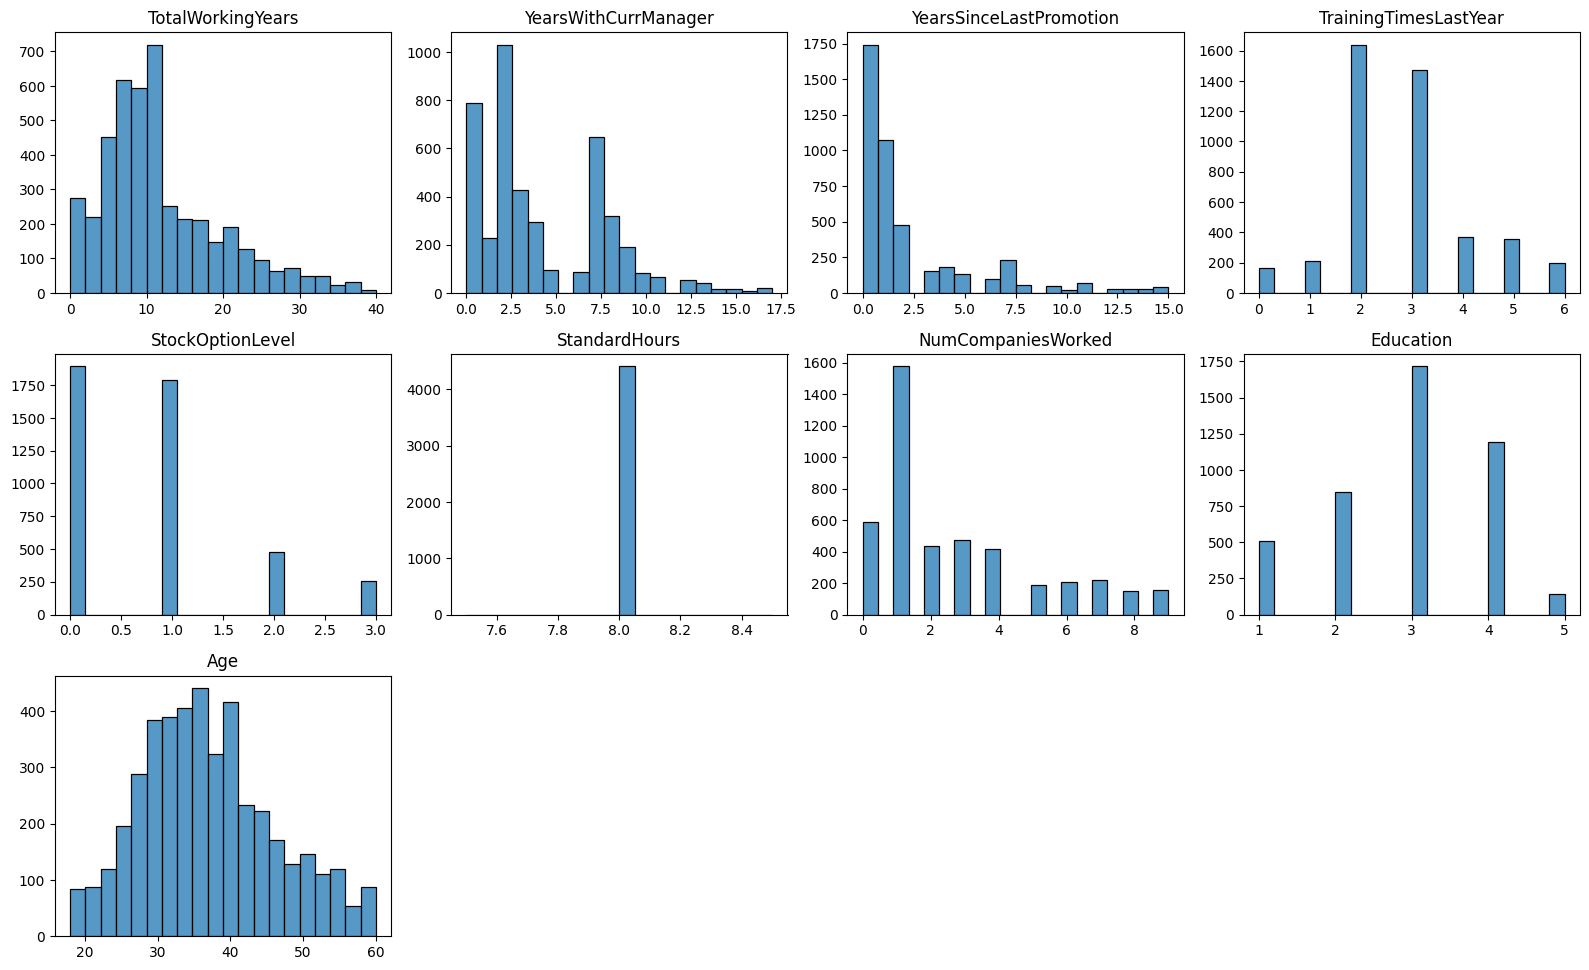

In [31]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(numerical_columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[column], kde=False, bins=20)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

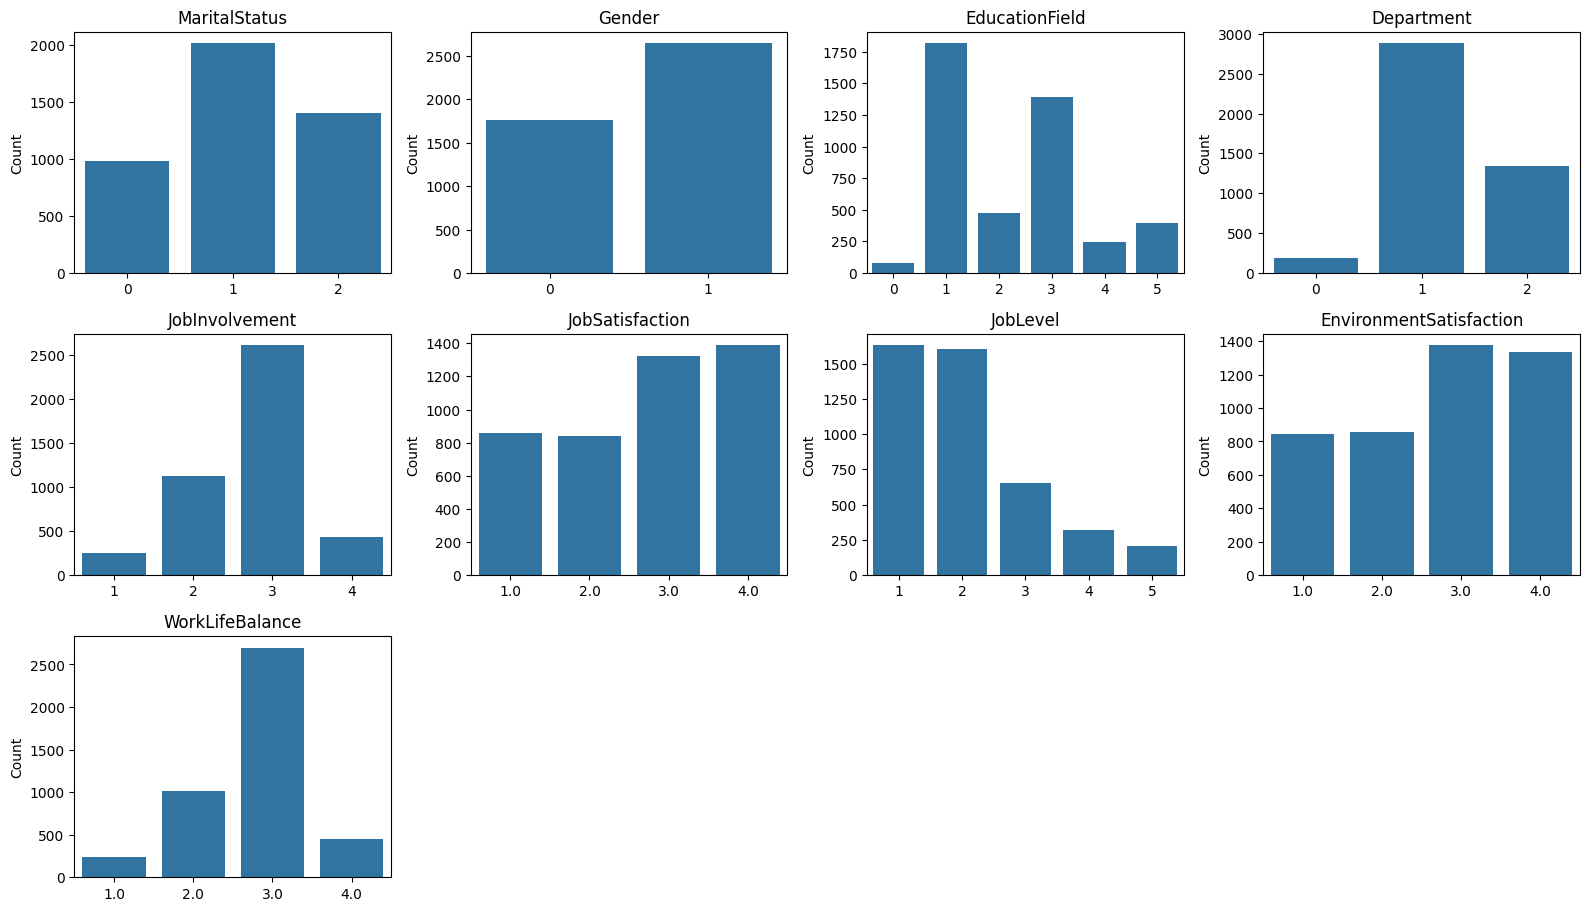

In [32]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=df[column])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

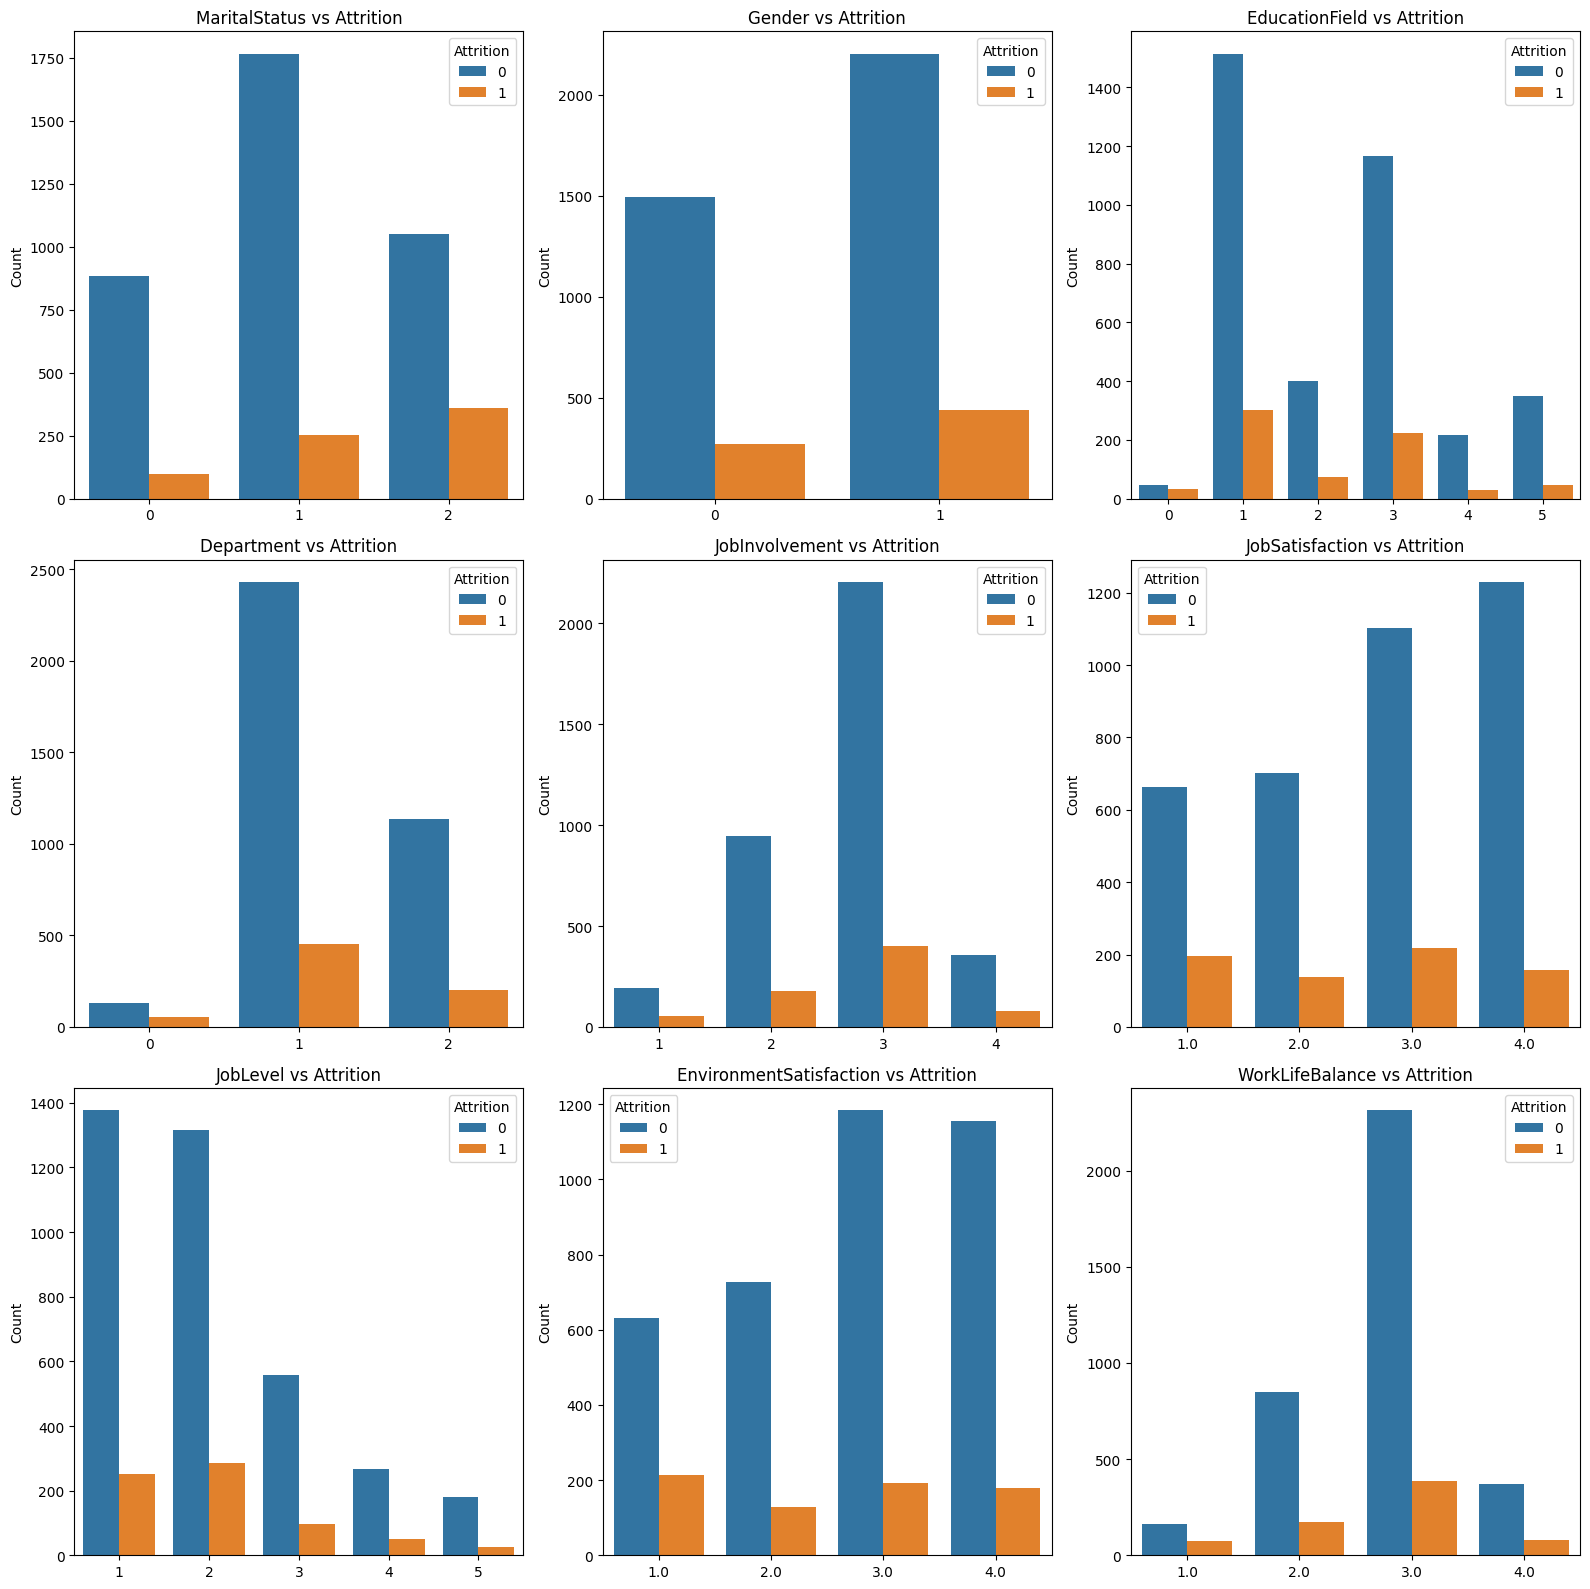

In [33]:
plt.figure(figsize=(16, 16))
for i, column in enumerate(categorical_columns):

    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=column, hue='Attrition')
    plt.title(f'{column} vs Attrition')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

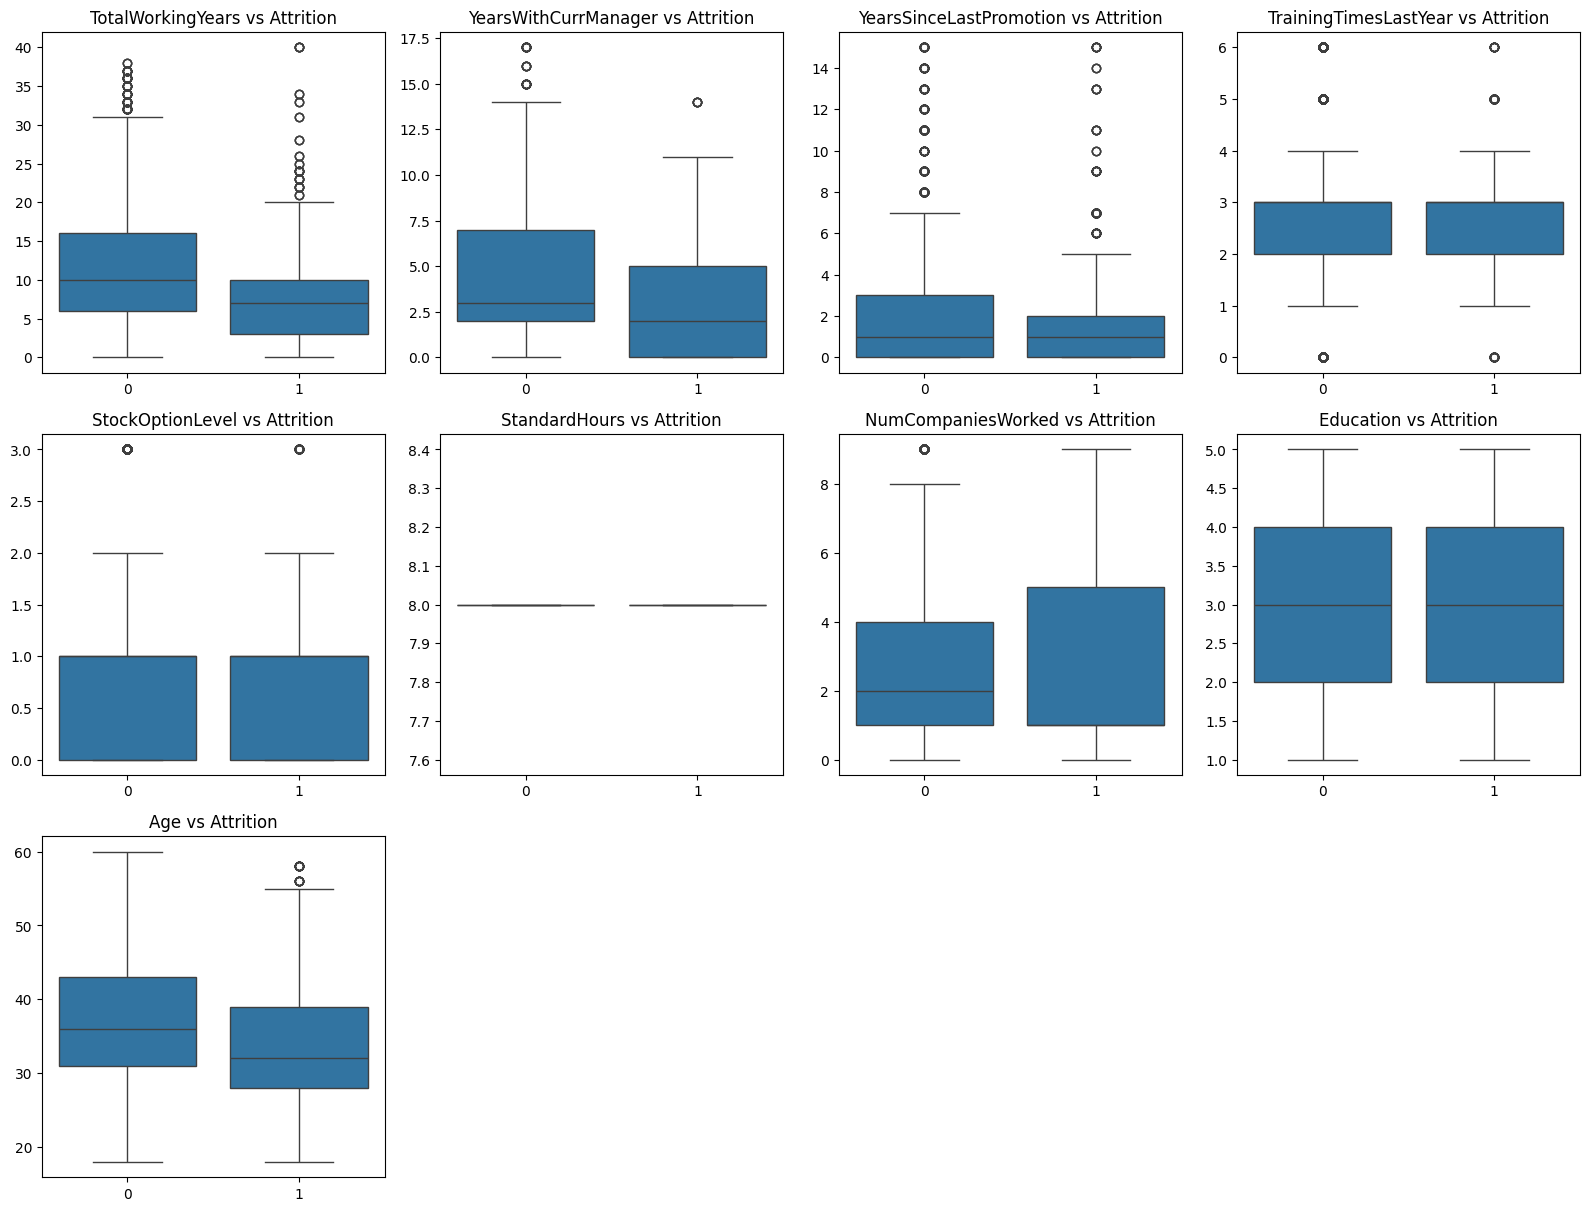

In [34]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x='Attrition', y=column)
    plt.title(f'{column} vs Attrition')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()